#Cross validation of the dataset 

In [4]:
#Preprocessing the dataset
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report,precision_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.model_selection import cross_val_score

#Transfert learning 
#from keras.applications.vgg16 import VGG16, preprocess_input

In [5]:
data = pd.read_csv('data\Tumeurs.csv')


In [6]:
y = data['label'].copy()
X = data.drop('label', axis=1).copy()

X = X/255 

In [7]:
X = np.array(X)
X = X.reshape(10015,784)

#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

lr = LogisticRegression(C =  10.0, penalty =  'l2')


scores = cross_val_score(lr, X, y, cv=5)

c:\Users\mathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

KeyboardInterrupt: 

In [ ]:
scores

array([0.67698452, 0.68647029, 0.67099351, 0.56714928, 0.59111333])

### Data Training_augmented

In [8]:
data_training = pd.read_csv('data\Tumeurs_train.csv')
data_training = data_training.drop('Unnamed: 0', axis = 1)

In [9]:
#Plot 9 images 
y = data_training['label'].copy()
X = data_training.drop('label', axis=1).copy()

X = X/255
X = np.array(X)
X = X.reshape(len(X),784)

In [10]:
#Let's name our label with the encoded label they have with a dicitonary 
label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}

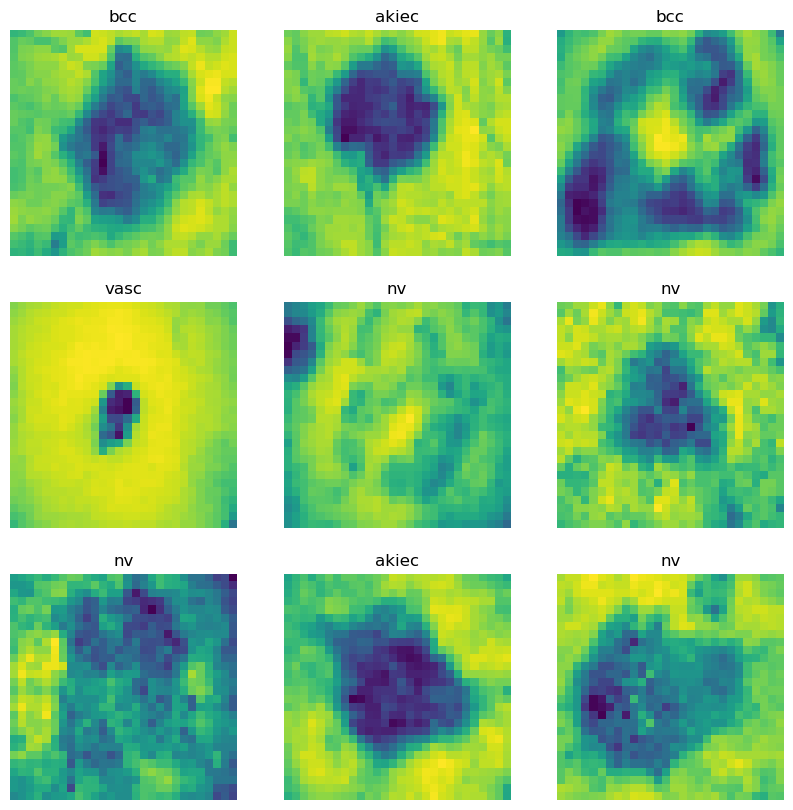

In [11]:
#plot the 9 first images with their label
X = np.array(X)
images = X.reshape(-1, 28, 28, 1)
plot = plt.figure(figsize=(10, 10))
for i in range(9):
    plot.add_subplot(3, 3, i+1)
    plt.imshow(images[i+262])
    plt.title(label_mapping[y[i+262]])
    plt.axis('off')

We know that there is some miss classification between the 0 and the 2. 
Rappelons que le 2 (bkl) et le 0 : (nv) sont 

### Amélioration des images par des filtres (renforcement de bords)

In [12]:
import numpy as np
from skimage import data
import matplotlib as plt
from scipy import signal
from matplotlib.pyplot import imshow, get_cmap
import matplotlib.pyplot as plt

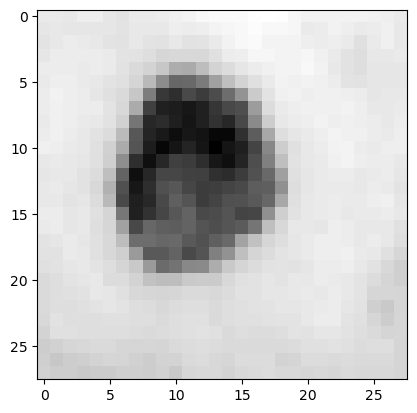

In [31]:
image_test = np.array(images[240]).reshape(28,28)
plt.imshow(image_test, cmap = 'gray')

In [27]:
image_test.shape

(28, 28)

### Augmentation de contraste 

In [32]:
def displayTwoBaWImages(img1, img2):
    _, axes = plt.subplots(ncols=2)
    axes[0].imshow(img1, cmap=plt.get_cmap('gray'))
    axes[1].imshow(img2, cmap=plt.get_cmap('gray'))

In [33]:
kernel_inccontrast = np.array([[0,0,0,0,0], 
                               [0,0,-1,0,0], 
                               [0,-1,5,-1,0], 
                               [0,0,-1,0,0], 
                               [0,0,0,0,0]])

In [34]:
image_test.shape

(28, 28)

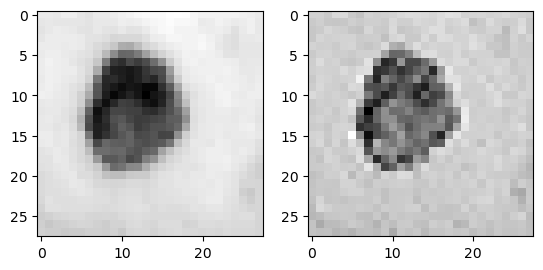

In [35]:
imgcontrast = signal.convolve2d(image_test, 
                              kernel_inccontrast, 
                              boundary='symm', 
                              mode='same')
displayTwoBaWImages(image_test, imgcontrast)

We have imgcontrast which is better i think. 

In [38]:
imgcontrast.shape

(28, 28)

In [72]:
# Let's do a function which with a dataset as input, take all the images and contrast them to after apply the convolution. 

data_training = pd.read_csv('data\Tumeurs_train.csv')
data_training = data_training.drop('Unnamed: 0', axis = 1)

def preprocessing_data_convolution(data) : 

    X_convolved = []

    #1. Separate the dataset
    y = data['label'].copy()
    X = data.drop('label', axis=1).copy()
    X = X/255
    X = np.array(X)
    #2. Loop to convolve each images. 
    for image in range(1, len(data)) : 
        image_test = np.array(X[image]).reshape(28,28)
        image_conv  = signal.convolve2d(image_test, 
                              kernel_inccontrast, 
                              boundary='symm', 
                              mode='same')
        
        X_convolved.append(image_conv)
        #print(np.array(X_convolved).shape)
        #plt.imshow(image_test, cmap = 'gray')
    return np.array(X_convolved)


        

In [73]:
result = preprocessing_data_convolution(data_training)

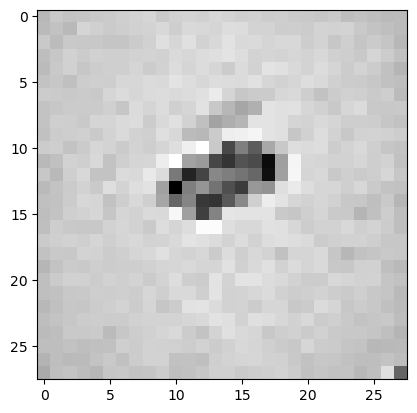

In [75]:
X = np.array(result)
images = X.reshape(-1, 28, 28, 1)
image_test = np.array(images[15]).reshape(28,28)
plt.imshow(image_test, cmap = 'gray')

#Anohter CNN 